# Proposal

For my final project, I would like to collect and analyze my Spotify data from the past year. I would test the correlation between the season and the differences in my top artists and the number of minutes listened. 


# Hypothesis

I predict that I will have the fewest minutes listened to over the summer, with pop/k-pop as the top artists. And I will have the most minutes listened to and a top artits of indie/chill/alternative during the fall. 

# Data in hand

I have downloaded my accounts spotify data with the entirity of my listening history. To collect ths data I went into my account profile and then went into the account privacy then scrolled down until the download mydata section and followed the instructions given  and then downloaded my extended listening history data from there and recieved an email in my inbox a few days later stating that my data was ready to be downloaded. I then downloaded the zip file and expanded it into usable data pages. It is split into mulitple different pages to cover the various songs and years that I have been using my spotify account. All of the files are housed within one folder for a chomprehensive look at my extended streaming history. For the sake of ease I may have to shrink my data to only one of the files, which from my research into the different pages would be part of a year, and maybe some of a boarding year depending on the breakdown and split. The files would be similar to those from the beginning of the semester and they are a json file type.

ex. of the file url to link into the code later: /Users/madelinelally/Downloads/Spotify Extended Streaming History/Streaming_History_Video_2021-2025.json

In [31]:
# 1. Import libraries

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [63]:
import os
import json
import pandas as pd

folder = r"/Users/madelinelally/Downloads/data in emat/Spotify Extended Streaming History"

all_data = []

for filename in os.listdir(folder):
    if filename.endswith(".json"):
        with open(os.path.join(folder, filename), "r") as f:
            all_data.extend(json.load(f))

df = pd.DataFrame(all_data)
df.head()


,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2022-04-27T10:48:27Z,"iOS 15.4.1 (iPhone12,1)",195866,US,173.90.175.125,Oh my god,(G)I-DLE,I trust,spotify:track:2DmRXiyn03tOqKgEJXlaiJ,None,...,None,None,None,trackdone,trackdone,True,False,False,NaN,False
1,2022-04-27T10:51:58Z,"iOS 15.4.1 (iPhone12,1)",205833,US,173.90.175.125,moonchild,RM,mono.,spotify:track:4fwYALz7GwmXgS8QTRjDEJ,None,...,None,None,None,trackdone,trackdone,True,False,False,NaN,False
2,2022-04-27T10:55:48Z,"iOS 15.4.1 (iPhone12,1)",229946,US,173.90.175.125,STUCKINMYBRAIN,Chase Atlantic,PHASES,spotify:track:4y38UExfSH97v6mz5Ii9am,None,...,None,None,None,trackdone,trackdone,True,False,False,NaN,False
3,2022-04-27T10:57:51Z,"iOS 15.4.1 (iPhone12,1)",122723,US,173.90.175.125,Can't Love Myself,Monty Datta,Can't Love Myself,spotify:track:0MO1qNhm8aRZchi8CJlIRo,None,...,None,None,None,trackdone,trackdone,True,False,False,NaN,False
4,2022-04-27T10:59:09Z,"iOS 15.4.1 (iPhone12,1)",76128,US,173.90.175.125,Losing You,WONHO,Love Synonym #1: Right for Me,spotify:track:2Bk8jjFB0FfAFYUIxihOnG,None,...,None,None,None,trackdone,fwdbtn,True,False,False,NaN,False


In [64]:
# Convert to DataFrame
df = pd.DataFrame(data)

In [65]:
df.head()

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2025-04-06T04:25:48Z,ios,245626,US,131.123.50.239,To Ashes and Blood (from the series Arcane Lea...,Woodkid,To Ashes and Blood (from the series Arcane Lea...,spotify:track:1clsf1YjKNHVUonDva4fnk,None,...,None,None,None,trackdone,trackdone,False,False,False,1743913302,False
1,2025-04-06T04:30:35Z,ios,226216,US,131.123.50.239,War Of Hearts,Ruelle,Up In Flames,spotify:track:4R8BdwRidxAWaYyFNU00P1,None,...,None,None,None,trackdone,trackdone,False,False,False,1743913548,False
2,2025-04-06T05:05:03Z,ios,165874,US,131.123.50.239,LET THE WORLD BURN (with G-Eazy & Ari Abdul) -...,Chris Grey,LET THE WORLD BURN (with G-Eazy & Ari Abdul),spotify:track:5wNDRMkoysXZGiW4ja5Tik,None,...,None,None,None,trackdone,trackdone,False,False,False,1743913835,False
3,2025-04-06T05:07:12Z,ios,128205,US,131.123.50.239,if u think i'm pretty,Artemas,pretty,spotify:track:1ACA277B6f46DYCgZW8di3,None,...,None,None,None,trackdone,trackdone,False,False,False,1743915903,False
4,2025-04-06T05:09:08Z,ios,115921,US,131.123.50.239,did i tell u that i miss u,adore,did i tell u that i miss u,spotify:track:3qeFjtPJ1lIRKDTB5DZWpt,None,...,None,None,None,trackdone,trackdone,False,False,False,1743916032,False


In [66]:
# Convert timestamps to datetime
df['ts'] = pd.to_datetime(df['ts'], errors='coerce')

# Convert ms → minutes listened
df['minutes_played'] = df['ms_played'] / 60000

# Remove entries with no valid timestamp
df = df.dropna(subset=['ts'])


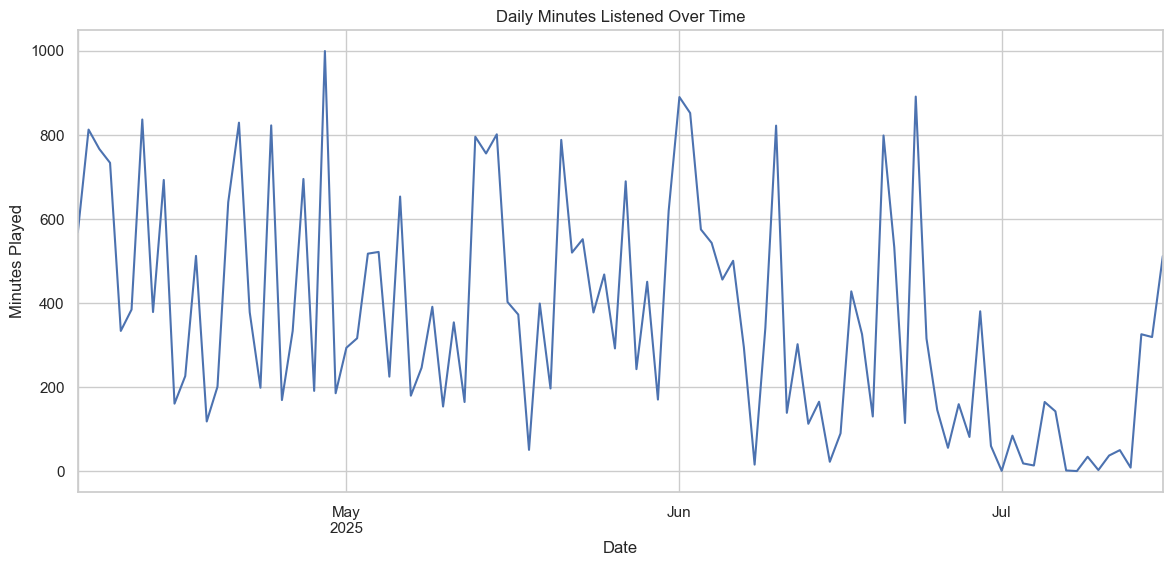

In [67]:
plt.figure(figsize=(14,6))
df.set_index('ts')['minutes_played'].resample('D').sum().plot()
plt.title("Daily Minutes Listened Over Time")
plt.xlabel("Date")
plt.ylabel("Minutes Played")
plt.show()


/var/folders/zj/ddt921s170zc0yz7nvcyp9dr0000gn/T/ipykernel_7179/2956115270.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_artists.index, x=top_artists.values, palette="mako")


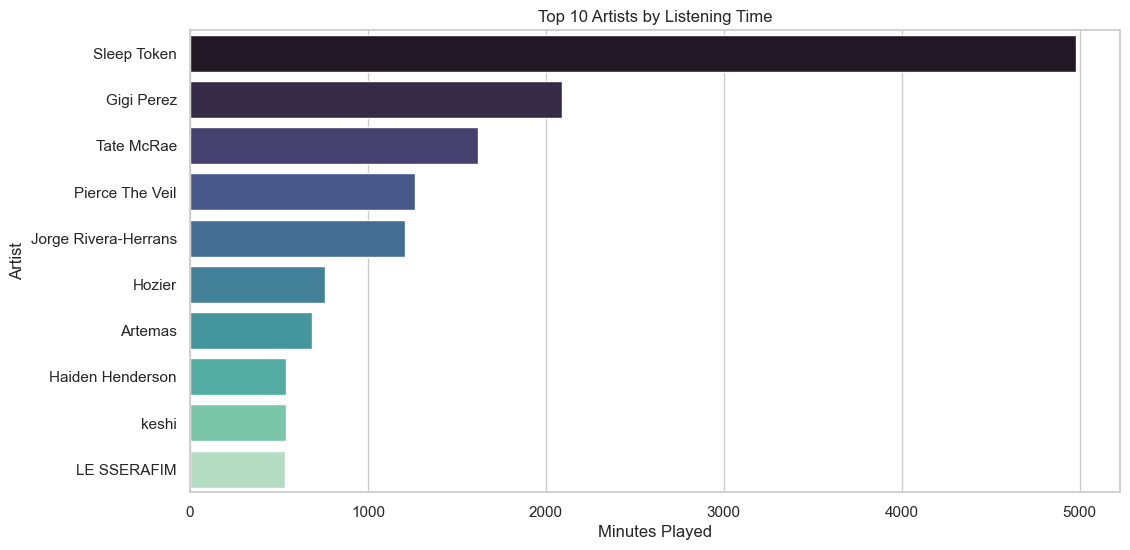

In [68]:
top_artists = (
    df.groupby('master_metadata_album_artist_name')['minutes_played']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

sns.barplot(y=top_artists.index, x=top_artists.values, palette="mako")
plt.title("Top 10 Artists by Listening Time")
plt.xlabel("Minutes Played")
plt.ylabel("Artist")
plt.show()


/var/folders/zj/ddt921s170zc0yz7nvcyp9dr0000gn/T/ipykernel_7179/2834269346.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_tracks.index, x=top_tracks.values, palette="viridis")


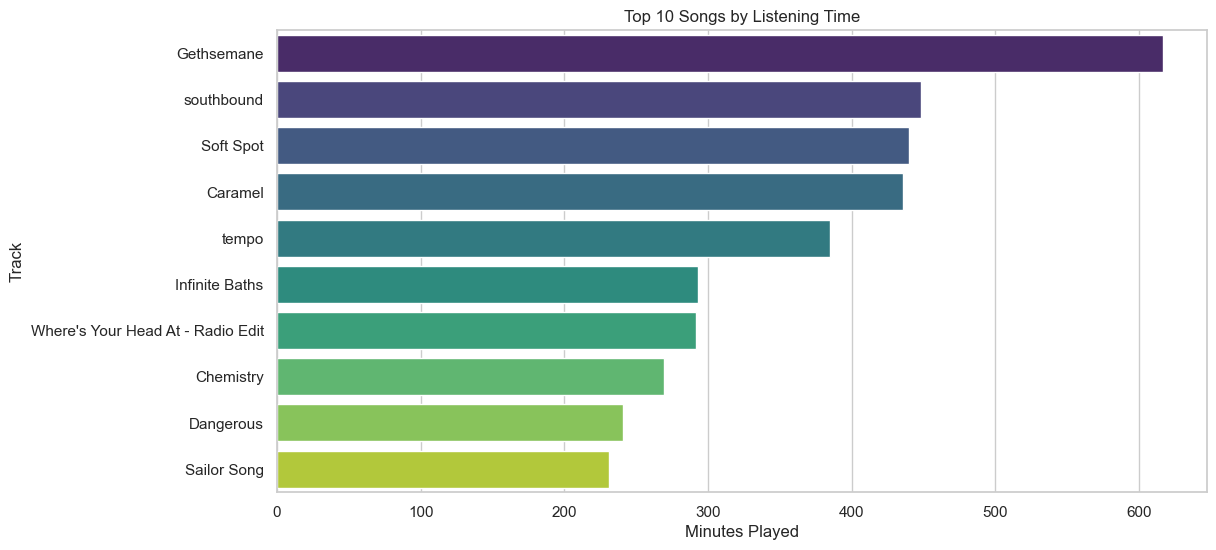

In [69]:
top_tracks = (
    df.groupby('master_metadata_track_name')['minutes_played']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

sns.barplot(y=top_tracks.index, x=top_tracks.values, palette="viridis")
plt.title("Top 10 Songs by Listening Time")
plt.xlabel("Minutes Played")
plt.ylabel("Track")
plt.show()


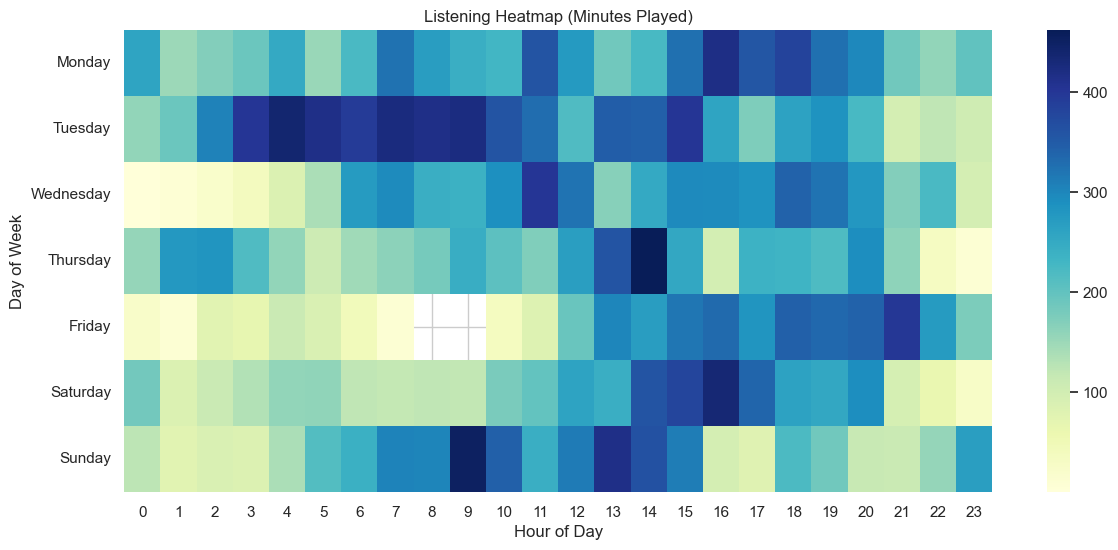

In [70]:
df['hour'] = df['ts'].dt.hour
df['day'] = df['ts'].dt.day_name()

pivot = df.pivot_table(
    index='day',
    columns='hour',
    values='minutes_played',
    aggfunc='sum'
)

# Reorder days
pivot = pivot.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Listening Heatmap (Minutes Played)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


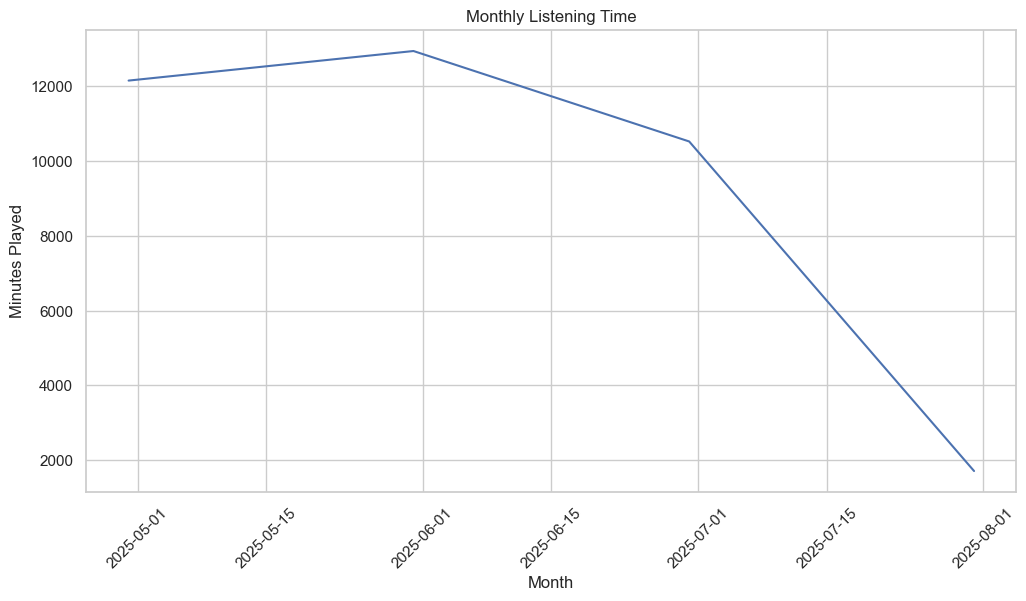

In [71]:
monthly = df.set_index('ts')['minutes_played'].resample('ME').sum()

plt.plot(monthly.index, monthly.values)
plt.title("Monthly Listening Time")
plt.xlabel("Month")
plt.ylabel("Minutes Played")
plt.xticks(rotation=45)
plt.show()


In [72]:
artists = df['master_metadata_album_artist_name'].dropna().unique()
artist_df = pd.DataFrame({'artist': artists})

artist_df.head()


,artist
0,Woodkid
1,Ruelle
2,Chris Grey
3,Artemas
4,adore


Based on this data I would condlude that my hypothesis was correct in thinking that i had the most minutes listened over the fall/winter/early spring(october-may) vs the late spring/summer/early fall (june-sept) and that i have more pop/kpop listened to in the warmer months compared to more alternative/indie in the cooler months.
also note that chatgpt has been use throughout for assistance in figuring out the proper code and adjustments, espicaially with creating the graphics.